In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url, sep=',', index_col=0)

print("Dataset view")
display(df.head())

print("General information about the dataset:")
print(df.info())

Dataset view


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None


# Procesamiento de la data

In [3]:
# Valores nulos
print("Valores nulos")
display(pd.isnull(df).sum())

Valores nulos


TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<Figure size 800x600 with 0 Axes>

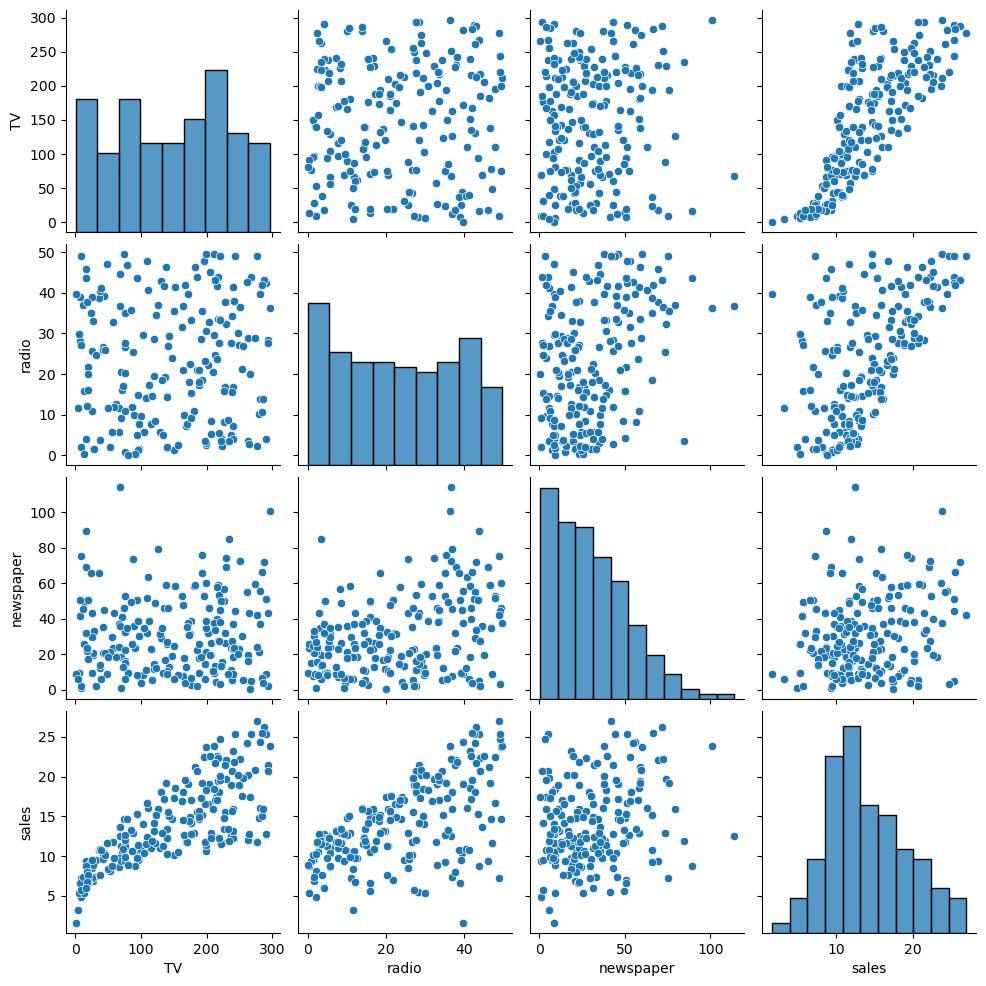

In [4]:
# Visualizacion de relaciones entre variables, para ver correlaciones
plt.figure(figsize=(8,6))
sns.pairplot(df)
plt.show()

# Modelo de regresion lineal

In [ ]:
# Dividir en variables independientes y dependientes
X = df.drop('sales', axis=1)
Y = df['sales']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

print(f"Entrenamiento {x_train.shape}, Testeo {x_test.shape}")

Entrenamiento (160, 3), Testeo (40, 3)


In [23]:
# Estandarizacion de datos
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Entrenamiento

In [24]:
model= LinearRegression()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)
print("5 primeras predicciones:")
for i in range(5):
    print(f"Predicción: {y_pred[i]:.3f}, Valor real: {y_test.iloc[i]}")

5 primeras predicciones:
Predicción: 16.408, Valor real: 16.9
Predicción: 20.890, Valor real: 22.4
Predicción: 21.554, Valor real: 21.4
Predicción: 10.609, Valor real: 7.3
Predicción: 22.112, Valor real: 24.7


## Evaluación

In [26]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Metricas del modelo:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

Metricas del modelo:
MSE: 3.1740973539761037
RMSE: 1.78159966153345
R^2: 0.899438024100912


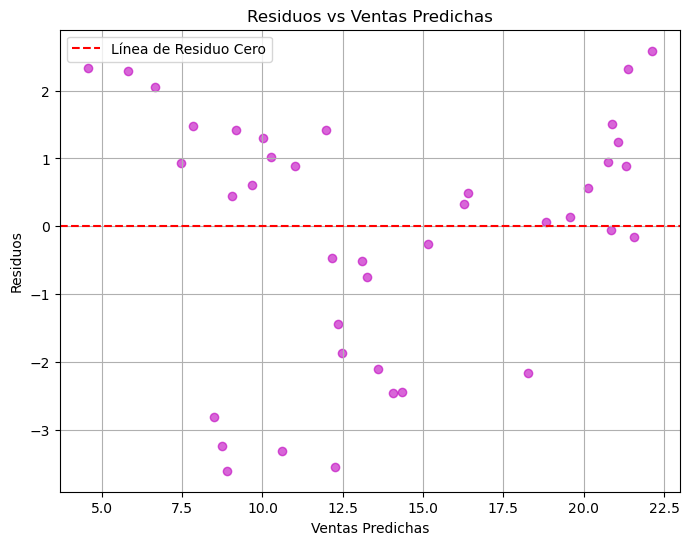

In [ ]:
# Residuos
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='m', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', label='Línea de Residuo Cero')
plt.xlabel('Ventas Predichas')
plt.ylabel('Residuos')
plt.title('Residuos vs Ventas Predichas')
plt.legend()
plt.grid()
plt.show()

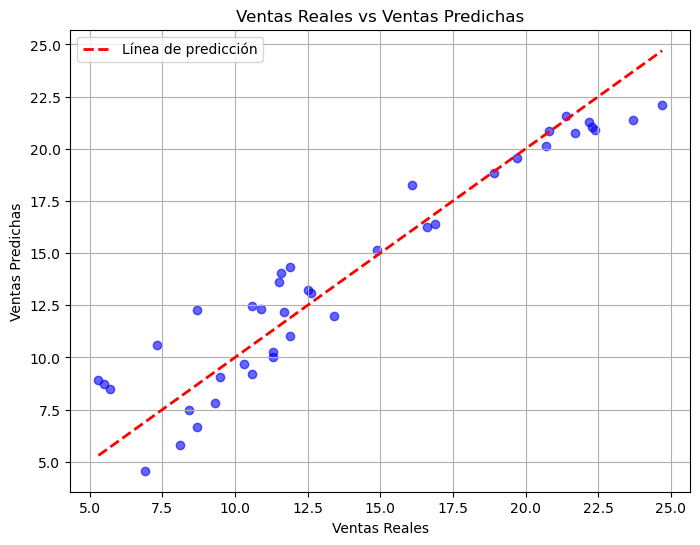

In [31]:
# Grafica de regresion
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='b', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea de predicción')
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title('Ventas Reales vs Ventas Predichas')
plt.legend()
plt.grid()
plt.show()